# INTERNSHIP GROUP 18 - INSURANCE CLAIM
### Ubong Camilus Ben

<img src="https://media.istockphoto.com/photos/selective-focus-of-magnifying-glassglasses-and-insurance-policy-on-a-picture-id1295819436?b=1&k=20&m=1295819436&s=170667a&w=0&h=twnnUknhHotXzO-ggy93PxuVZwuAJzhUQEPFnBfxI3Q=">

# Introduction

In insurance, claim estimation is an integral part of the pricing and reserving pipeline. Being able to generate a fully transparent and highly accurate prediction for a given risk is indispensable for all insurers as it: 
1) enables insurers to accurately price for various risk levels,
2) facilitates regulatory reporting, and 
3) informs business strategy on how various market segments should be treated. 



### Statement of Problem

For the estimation of claims, industry is currently using traditional approaches. Traditional approaches such as GLM’s are fully transparent but lack in terms of accuracy and also require significant manual feature selection and interactions set-up. Deep learning however handles feature selection implicitly and is generally more accurate than traditional approaches but lacks transparency. Recent advances saw the unification of these two approaches and hence the road is already paved to implement these methods and possibly create a stand-alone SaaS product leveraging these SOTA methods.
######  Utilising these SOTA methods and essentially getting ahead of the curve will be a key differentiator for ExploreAI in the pricing space and extending the outcomes from this R&D project to a SaaS solution is a realistic possibility.


###  Aim of the Project

 The aim of this project is to develop a robust model that predicts the all-inclusive claim cost for a given unit of exposure with high accuracy whilst providing full transparency in the model’s decisions.

<img src="https://media.istockphoto.com/photos/concept-of-auto-coverage-picture-id1140953588?k=20&m=1140953588&s=612x612&w=0&h=fYS9CjF-bZEMJXmVIBPZEOzlnKNKp0puTrZNbvagPm8=">



<a id="cont"></a>
# Table of contents:
1. <a href=#one>Importing Packages</a>

2. <a href=#two>Loading data</a>

3. <a href=#three>Exploratory data analysis</a>

4. <a href=#four>Data Engineering</a>

5. <a href=#five>Modelling</a>

6. <a href=#six>Model Performance</a>

7. <a href=#seven>Conclusion and Recommendations</a>

   <a href=#ref>References</a>




<a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section, we will import the necessary libraries that will be used throughout analysis and modelling. |


In [53]:
# Conventional Libraries
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import html




<a id="two"></a>
## 2. Loading the Data
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section, the team will load the DataFrame. |

---

In [5]:
Original_data=pd.read_excel('C:/Users/USER/Documents/eXplore academy/Internship/Datasets/Sample Dataset.xlsx')

#copy dataset to protect original dataset
data=Original_data
data.head()

,PolicyId,ClaimId,TotalClaimAmount,CountTotalClaimAmount,PremiumSum,CasePremiumSum,PaymentDueDate,TotalPremiumPaymentCount,PreviousInsurerExcess,PreviousInsurerPremium,...,PolicyStatus,CommencementDt,PolicyEndDate,SumAssured,MeanExcess,TotalExcess,ExcessTypesCount,BaseExcess,NomimatedDriversCount,NomimatedDriversUnder30Count
0,10806273.0,NaN,NaN,NaN,4915.98,4369.76,2021-12-29,8.0,0.0,0.0,...,Cancelled,2020-01-06,2021-12-29 14:46:25.485,45700.0,3166.666666,19000.0,6.0,1000.0,2.0,1.0
1,10822247.0,NaN,NaN,NaN,3342.60,668.52,2020-09-30,1.0,4500.0,900.0,...,Lapsed,2020-05-18,2020-10-16 00:00:44.012,113100.0,4500.000000,9000.0,2.0,5000.0,1.0,1.0
2,10941976.0,NaN,NaN,NaN,1762.54,1762.54,2022-07-28,3.0,0.0,808.0,...,Active,2022-05-30,NaT,92900.0,3333.333333,20000.0,6.0,1000.0,0.0,0.0
3,10782539.0,NaN,NaN,NaN,3723.60,3723.60,2021-08-31,5.0,0.0,0.0,...,Cancelled,2019-07-18,2021-09-25 14:09:25.765,173800.0,5720.000000,34320.0,6.0,5000.0,1.0,0.0
4,10916477.0,NaN,NaN,NaN,2478.72,0.00,2022-03-31,0.0,0.0,0.0,...,Lapsed,2022-01-10,2022-04-16 00:02:41.864,240200.0,6286.666666,37720.0,6.0,5000.0,0.0,0.0


<a id="three"></a>
## 3. Data Cleaning & Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description:  ⚡ |
| :--------------------------- |
| In this section, we would perform exploratoray analysis targeted at having a good understanding of all the variables in the DataFrame. |

---


### *Far better an approximate answer to the right question, which is often vague, than an exact answer to the wrong question, which can always be made precise.*
### - John W. Tukey

<img src="https://media1.giphy.com/media/xT9C25UNTwfZuk85WP/200.webp?cid=ecf05e47t1jd4v0ee1s335gds6plvujnbmln22ya1jctb1s2&rid=200.webp&ct=g">

First, lets us have a general look at  all the columns...

In [9]:
for item in data.columns:
    print(item)

PolicyId
ClaimId
TotalClaimAmount
CountTotalClaimAmount
PremiumSum
CasePremiumSum
PaymentDueDate
TotalPremiumPaymentCount
PreviousInsurerExcess
PreviousInsurerPremium
EmploymentType
IsMemberPayer
Employer
Occupation
IndustryType
Gender
BirthDt
MaritalStatus
Make
Model
Colour
Transmission
VehicleType
BodyType
CubicCapacity
Cyl
Kilowatts
VehicleYear
PolicyMainDriverAnnualMileage
PolicyMainDriverLicenseDurationRange
PersonProvince
Area
MonthsSinceInception
DaysSinceInception
PolicyStatus
CommencementDt
PolicyEndDate
SumAssured
MeanExcess
TotalExcess
ExcessTypesCount
BaseExcess
NomimatedDriversCount
NomimatedDriversUnder30Count


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 44 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   PolicyId                              36 non-null     float64       
 1   ClaimId                               4 non-null      float64       
 2   TotalClaimAmount                      4 non-null      float64       
 3   CountTotalClaimAmount                 4 non-null      float64       
 4   PremiumSum                            36 non-null     float64       
 5   CasePremiumSum                        36 non-null     float64       
 6   PaymentDueDate                        36 non-null     datetime64[ns]
 7   TotalPremiumPaymentCount              36 non-null     float64       
 8   PreviousInsurerExcess                 36 non-null     float64       
 9   PreviousInsurerPremium                36 non-null     float64       
 10  Empl

Most of the columns contain numeric data type. There are a couple of nulls too. However, we may have to be to carefull with the nulls because some of them are data itself.

In [44]:
data.drop(['PolicyId','ClaimId'], axis=1).describe()

,TotalClaimAmount,CountTotalClaimAmount,PremiumSum,CasePremiumSum,TotalPremiumPaymentCount,PreviousInsurerExcess,PreviousInsurerPremium,IsMemberPayer,Employer,CubicCapacity,...,VehicleYear,MonthsSinceInception,DaysSinceInception,SumAssured,MeanExcess,TotalExcess,ExcessTypesCount,BaseExcess,NomimatedDriversCount,NomimatedDriversUnder30Count
count,4.000000,4.00000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,0.0,36.000000,...,36.000000,23.000000,23.000000,31.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,88139.752500,1.50000,4946.585000,3797.299167,4.555556,3291.666667,599.750000,0.972222,NaN,1458.000000,...,2014.694444,10.913043,333.565217,151061.290323,5055.625000,23448.888889,4.444444,4236.111111,0.583333,0.111111
std,55380.008568,0.57735,3819.426842,4248.975871,4.122721,5910.493090,629.826841,0.166667,NaN,454.554539,...,4.609428,9.287886,283.501776,73256.538627,1906.105347,13947.892780,2.103663,1560.613941,0.731925,0.318728
min,45504.710000,1.00000,447.560000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,898.000000,...,2005.000000,0.000000,3.000000,35900.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,47293.310000,1.00000,2373.187500,627.165000,1.000000,0.000000,0.000000,1.000000,NaN,1235.250000,...,2013.000000,4.500000,135.500000,92900.000000,4171.250000,9000.000000,2.000000,5000.000000,0.000000,0.000000
50%,71677.150000,1.50000,3602.280000,2681.430000,4.000000,0.000000,574.500000,1.000000,NaN,1396.000000,...,2015.000000,8.000000,235.000000,154900.000000,4896.666666,24685.000000,6.000000,5000.000000,0.000000,0.000000
75%,112523.592500,2.00000,6930.492500,4712.580000,8.000000,4625.000000,1050.000000,1.000000,NaN,1521.500000,...,2018.000000,15.500000,480.500000,196100.000000,6071.249999,34692.500000,6.000000,5000.000000,1.000000,0.000000
max,163700.000000,2.00000,15120.000000,15120.000000,12.000000,27000.000000,2000.000000,1.000000,NaN,3198.000000,...,2021.000000,31.000000,941.000000,307000.000000,9172.500000,54720.000000,6.000000,5000.000000,3.000000,1.000000


In [46]:
print('Skew Analysis For Each Numerical Feature In The Dataframe')
data.skew() 

Skew Analysis For Each Feature In The Dataframe


C:\Users\USER\AppData\Local\Temp/ipykernel_14088/3552841491.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


PolicyId                        0.783024
ClaimId                        -1.828202
TotalClaimAmount                1.134683
CountTotalClaimAmount           0.000000
PremiumSum                      1.269852
CasePremiumSum                  1.384911
TotalPremiumPaymentCount        0.671045
PreviousInsurerExcess           2.649024
PreviousInsurerPremium          0.526999
IsMemberPayer                  -6.000000
Employer                             NaN
CubicCapacity                   1.830386
Cyl                            -0.789200
Kilowatts                       1.353472
VehicleYear                    -0.700674
MonthsSinceInception            1.023057
DaysSinceInception              1.010761
SumAssured                      0.203514
MeanExcess                      0.124076
TotalExcess                     0.018928
ExcessTypesCount               -0.765858
BaseExcess                     -1.858308
NomimatedDriversCount           1.314824
NomimatedDriversUnder30Count    2.583803
dtype: float64


|   Skew Value (x)  |       Description of Data      |
|:-------------------|:---------------:|
| -0.5 < x < 0.5              |Fairly Symmetrical |
| -1 < x < -0.5 | Moderate Negative Skew  | 
| 0.5 < x < 1             | Moderate Positive Skew  | 
|       x < -1     |High Negative Skew  | 
|       x > 1  |High Positve Skew | 

<div align="left" style="width: 500px; font-size: 80%; text-align: left; margin: 0 auto">
<img src="https://github.com/Explore-AI/Pictures/blob/f3aeedd2c056ddd233301c7186063618c1041140/regression_analysis_notebook/skew.jpg?raw=True"
     alt="Dummy image 1"
     style="float: left; padding-bottom=0.5em"
     width=500px/>

Out of the 22 non-id features, 17 features show moderate to high skewness. This means that the data is generally unevenly distributed. 

In [47]:

print('Kurtosis Analysis For Each Feature In The Dataframe')
data.kurtosis() 

Kurtosis Analysis For Each Feature In The Dataframe


C:\Users\USER\AppData\Local\Temp/ipykernel_14088/2584516672.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.kurtosis()


PolicyId                        -0.428320
ClaimId                          3.520444
TotalClaimAmount                 0.153628
CountTotalClaimAmount           -6.000000
PremiumSum                       0.938522
CasePremiumSum                   1.105361
TotalPremiumPaymentCount        -0.775161
PreviousInsurerExcess            7.882638
PreviousInsurerPremium          -0.983441
IsMemberPayer                   36.000000
Employer                              NaN
CubicCapacity                    5.190667
Cyl                              1.176471
Kilowatts                        0.579019
VehicleYear                     -0.355437
MonthsSinceInception            -0.204103
DaysSinceInception              -0.287536
SumAssured                      -0.792964
MeanExcess                       1.191552
TotalExcess                     -0.801959
ExcessTypesCount                -1.280164
BaseExcess                       2.076550
NomimatedDriversCount            2.017863
NomimatedDriversUnder30Count     4

Kurtosis of greater of than generally indicate presence of outliers. <br> From the dataset, it can be observed that PreviousInsurerExcess,  NomimatedDriversUnder30Count, CubicCapacity,  and IsMemberPayer columns indicate considerable presence of outliers. <br> 
Considering the dataset, Cubic capacity of vehicles can go from high to low depending on the engine type of the make. For the other columns, there are lots of zeros which is still good data.

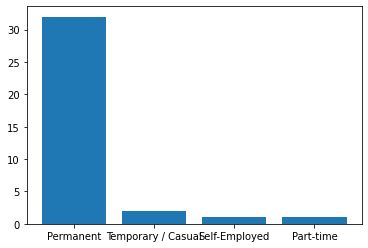

In [40]:
#What are the common employment type
emp=dict()
for typ in data['EmploymentType']:
    if typ not in emp:
        emp[typ]=1
    else:
        emp[typ]+=1
plt.bar(emp.keys(),emp.values())  
plt.show()

Here, it can be observed that most policyholders had permanent employment. 
Literature indicates that insurance companies prefer these kind of employees

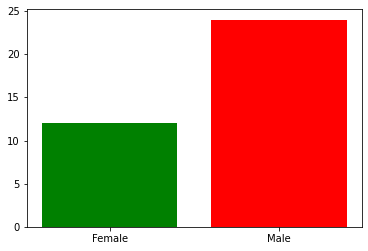

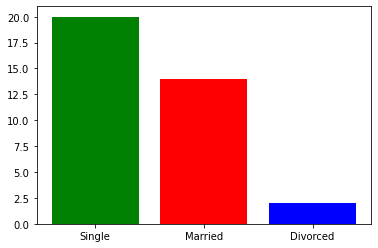

In [34]:
#Based on age and gender, how risky ae the policy holders
emp=dict()
for typ in data['Gender']:
    if typ not in emp:
        emp[typ]=1
    else:
        emp[typ]+=1
plt.bar(emp.keys(),emp.values(),color=['g','r'])  
plt.show()

emp=dict()
for typ in data['MaritalStatus']:
    if typ not in emp:
        emp[typ]=1
    else:
        emp[typ]+=1
plt.bar(emp.keys(),emp.values(), color=['g','r','b'])  
plt.show()

It can be observed here that most policyholders are male and single. 
This set are normally high risk takers or as a matter of fact, high profiles

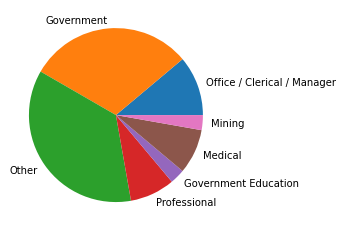

In [38]:
emp=dict()
for typ in data['IndustryType']:
    if typ not in emp:
        emp[typ]=1
    else:
        emp[typ]+=1
plt.pie(emp.values(), labels=emp.keys())  
plt.show()

Goverment Jobs are known  for known for security. 

This is actually good for insurance companies and shows that we are dealing with a good dataset

In [55]:
data=data.drop(['PolicyId','ClaimId'],axis=1)

Lets look us evaluate correlation between features in the dataset. Please kindly click on the heatmap to enlarge it and see the figures.

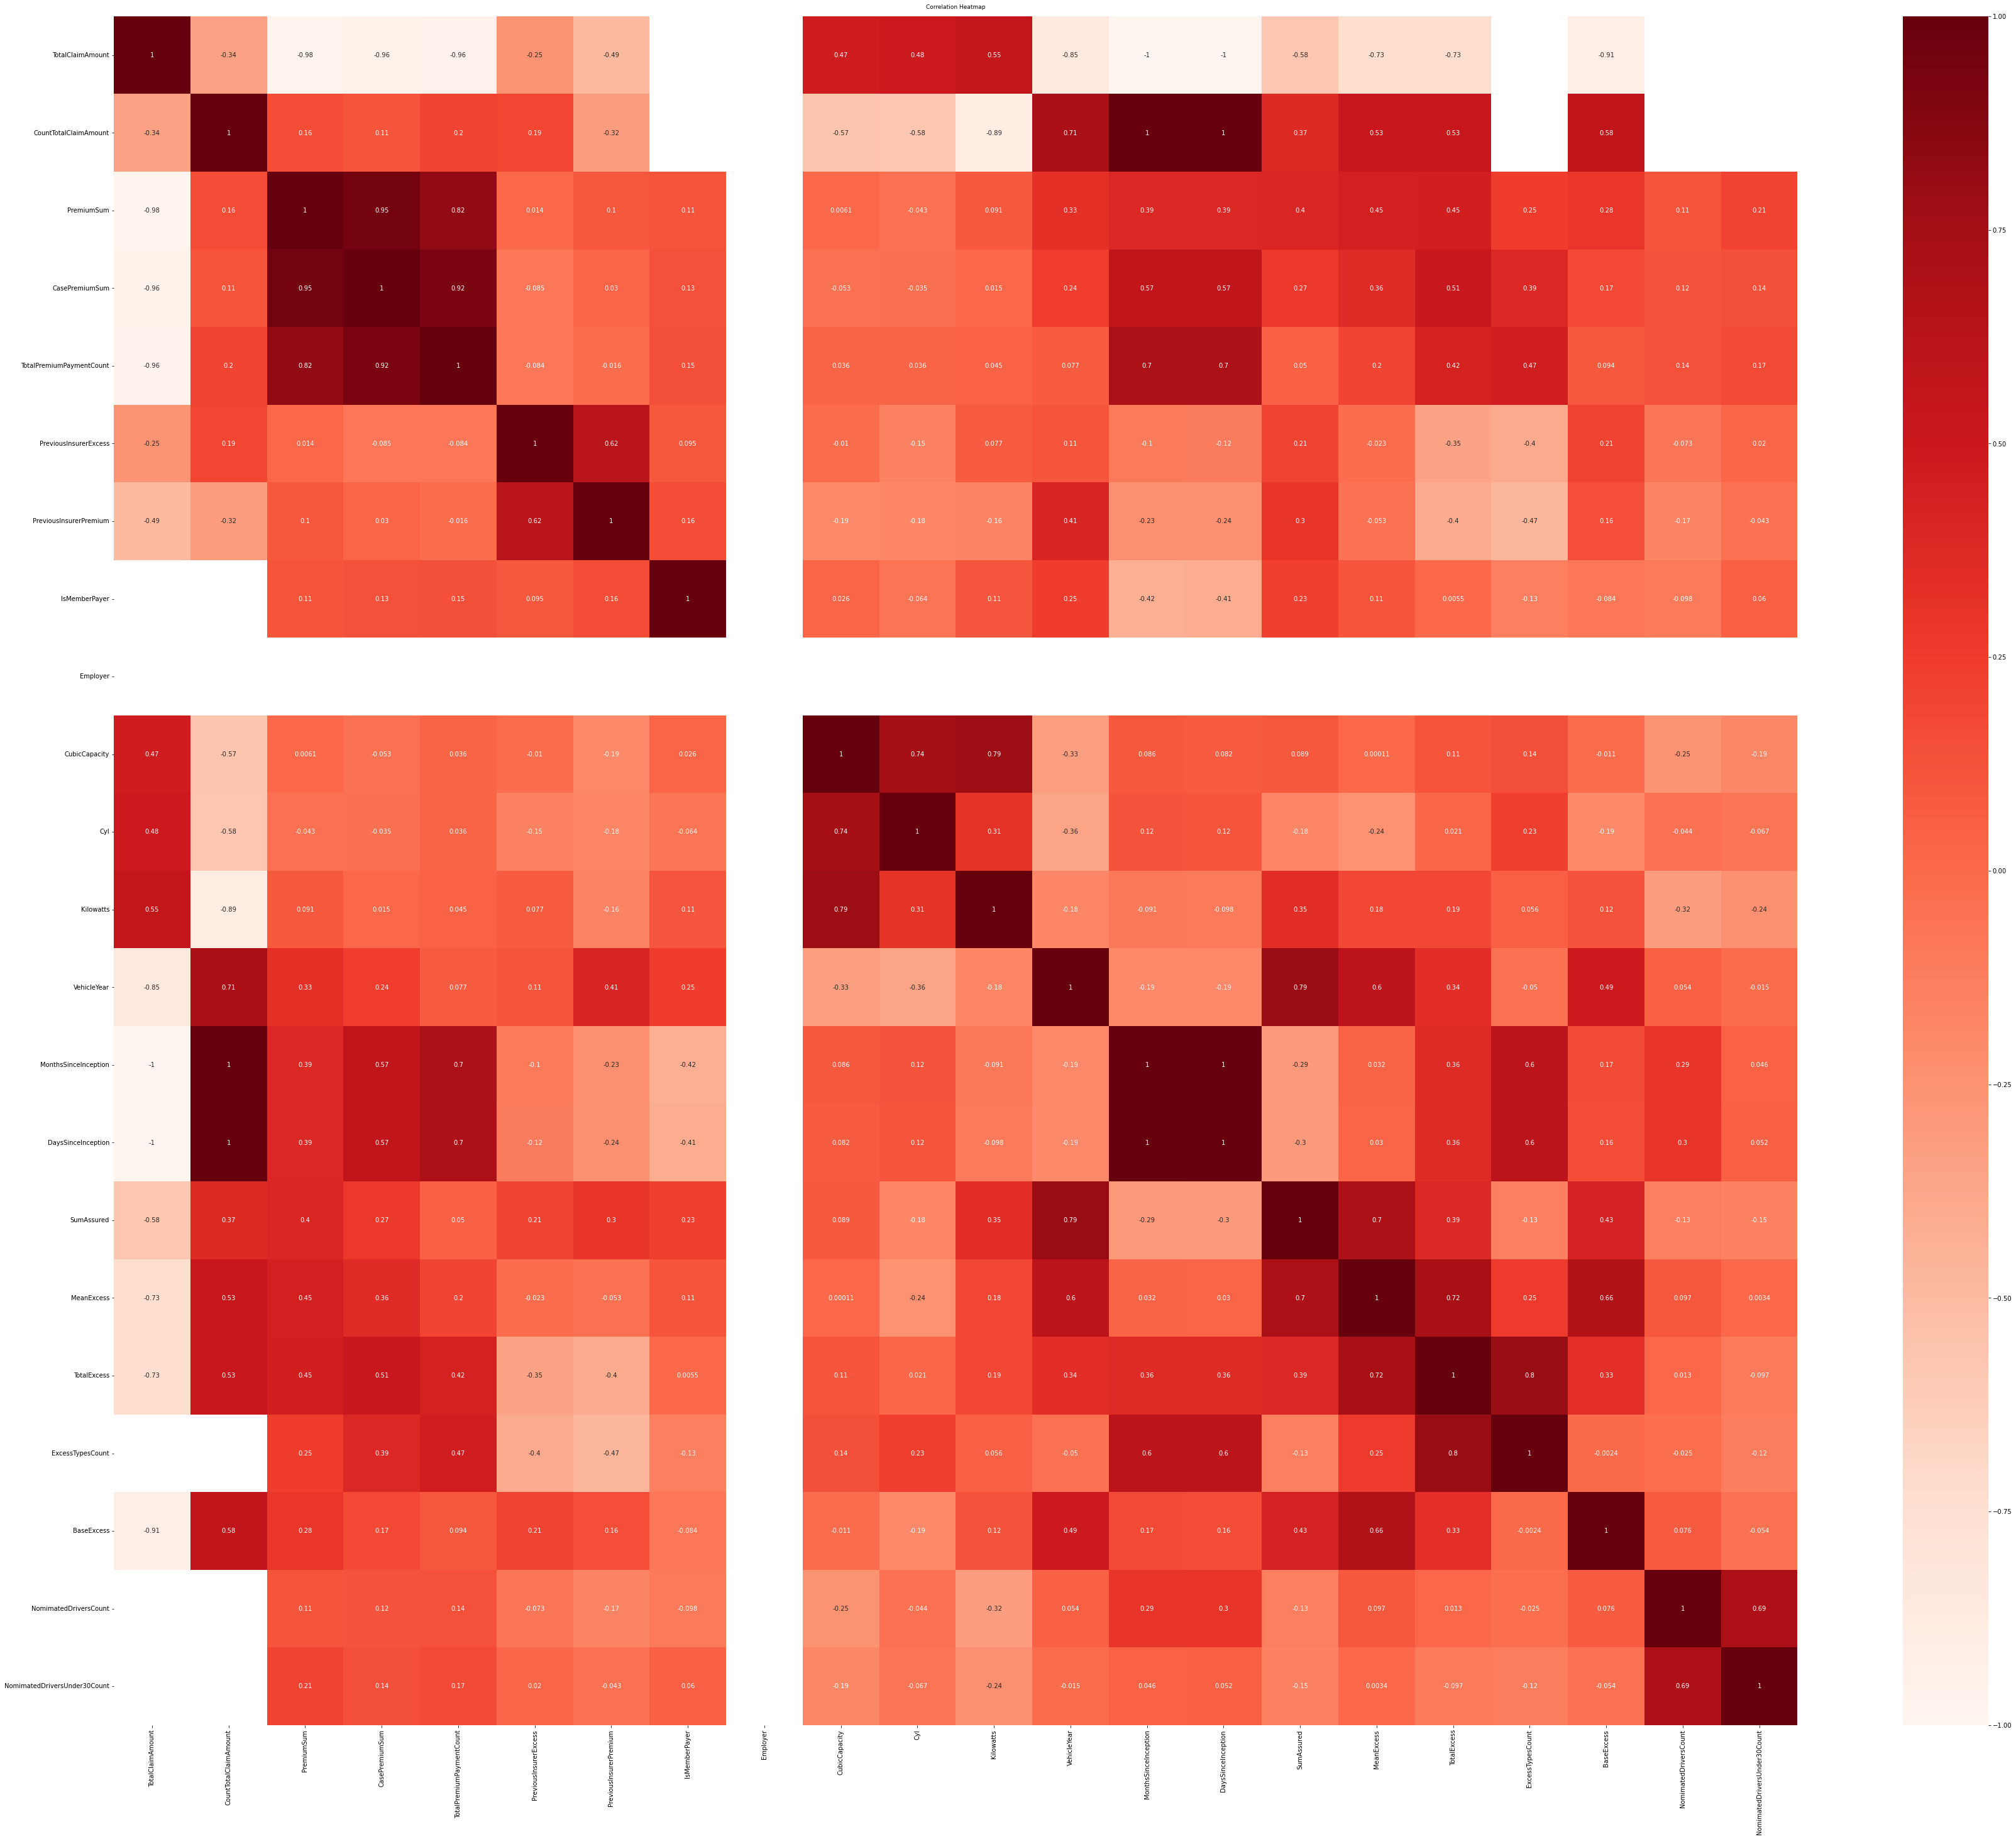

In [56]:
plt.figure(figsize=(60,50))
#sns.set(font_scale=3)
heatmap = sns.heatmap(data.corr(),cbar=True,annot=True,cmap='Reds')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':9}, pad=12);

<bound method DataFrame.corr of     TotalClaimAmount  CountTotalClaimAmount  PremiumSum  CasePremiumSum  \
0                NaN                    NaN     4915.98         4369.76   
1                NaN                    NaN     3342.60          668.52   
2                NaN                    NaN     1762.54         1762.54   
3                NaN                    NaN     3723.60         3723.60   
4                NaN                    NaN     2478.72            0.00   
5                NaN                    NaN     3920.00            0.00   
6                NaN                    NaN     2800.00            0.00   
7                NaN                    NaN     7008.05         7008.05   
8                NaN                    NaN      831.15            0.00   
9                NaN                    NaN     5915.56         3380.32   
10               NaN                    NaN     6904.64         3452.32   
11               NaN                    NaN     2956.88         1558